In [35]:
import obspy
import numpy as np
import pathlib
import hvsrpy

### Time Domain Settings

windowlength = 60

filter_bool = False       
filter_flow = 0.1                   
filter_fhigh = 40                  
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
# 余弦锥度宽度 {0. - 1.}。 Geopsy 默认值 0.05 等于 0.1 -> 建议使用 0.1
width = 0.1

### Frequency Domain Settings

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40
# Minimum frequency after resampling
resample_fmin = 0.5
# Maximum frequency after resampling
resample_fmax = 30
# Number of frequencies after resampling 重采样后的频率点数
resample_fnum = 1000
# Type of resampling {'log', 'linear'}
resample_type = 'linear'
# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None


### HVSR Settings

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"


### Plot Settings

# Manually set the ylimits of the HVSR figures. Default is None so limits will be set automatically.
ymin, ymax = None, None

In [36]:
# trace11 = obspy.read('/home/user/CSIM/zhangzhiyu/d2l/YXMK/YXsac/YXmseed/453014616/hour1.mseed')[0]
# trace22 = obspy.read('/home/user/CSIM/zhangzhiyu/d2l/YXMK/YXsac/YXmseed/453014616/hour1.mseed')[1]
# trace33 = obspy.read('/home/user/CSIM/zhangzhiyu/d2l/YXMK/YXsac/YXmseed/453014616/hour1.mseed')[2]

bp_filter = {"flag":filter_bool, 
            "flow":filter_flow, 
            "fhigh":filter_fhigh, 
            "order":filter_order}

resampling = {"minf":resample_fmin, 
            "maxf":resample_fmax, 
            "nf":resample_fnum, 
            "res_type":resample_type}



path = pathlib.Path('/Volumes/CSIM_LAB/liuhui/yingpan0/dongtujiance/18/')
path_X = pathlib.Path(path, 'xh')
path_Y = pathlib.Path(path, 'yh')
path_Z = pathlib.Path(path, 'zh')

hvs = {}
for i in range(1, 13):
    trace11 = obspy.read(path_X / f'{i}' / f'S{i}_X_1.sac')[0]
    trace22 = obspy.read(path_Y / f'{i}' / f'S{i}_Y_1.sac')[0]
    trace33 = obspy.read(path_Z / f'{i}' / f'S{i}_Z_1.sac')[0]

    trace11.meta.channel = 'BHE'
    trace22.meta.channel = 'BHN'
    trace33.meta.channel = 'BHZ'

    sensor = hvsrpy.Sensor3c.from_Stream(obspy.Stream([trace11, trace22, trace33]))

    hv = sensor.hv(windowlength, 
                bp_filter, 
                width, 
                bandwidth, 
                resampling, 
                method, 
                f_low=peak_f_lower, 
                f_high=peak_f_upper, 
                azimuth=azimuth)

    name = f'{i}'
    hvs[name] = hv.mean_curve(distribution_mc)
    print('Done! ', name)


/Users/zhiyuzhang/miniconda3/envs/hvsrpy/lib/python3.8/site-packages/obspy/io/sac/util.py:429: UserWarning: SAC file with 2-digit year header field encountered. This is not supported by the SAC file format standard. Prepending '19'.
  warnings.warn(TWO_DIGIT_YEAR_MSG)


Done!  1
Done!  2
Done!  3
Done!  4
Done!  5
Done!  6
Done!  7
Done!  8
Done!  9
Done!  10
Done!  11
Done!  12


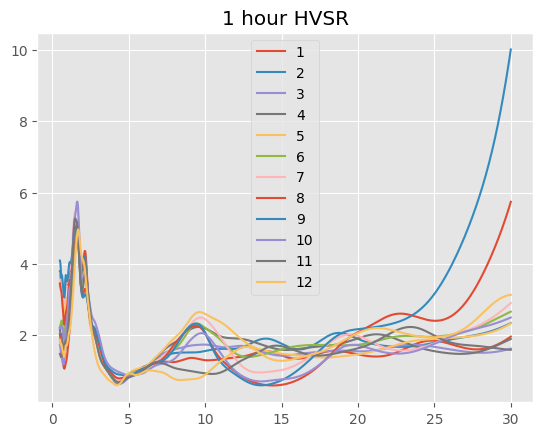

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

data = []
with plt.style.context('ggplot'):
    for key, value in hvs.items():
        data.append(value)
        plt.plot(hv.frq, value, label=key)
    plt.legend()
    plt.title('1 hour HVSR')

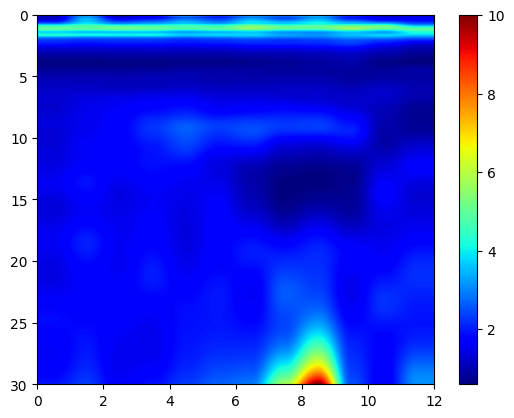

In [39]:
data = np.array(data)

plt.imshow(data.T, cmap='jet', aspect='auto', extent=[0, 12, 30, 0])

plt.colorbar()